In [109]:
import numpy as np
import os
import pandas as pd
import torch
import albumentations as A
import albumentations.pytorch
import cv2
import sys
import random
import csv
import json
import matplotlib.pyplot as plt

sys.path.append('../')
%matplotlib inline

In [110]:

BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White

def visualize_bbox(img, bbox, color=BOX_COLOR, thickness=2):
    """Visualizes a single bounding box on the image"""
#     x_min, y_min, x_max, y_max = list(map(int, bbox))
#     print(bbox)
    x_min, y_min, w, h = (bbox)
    x_max = x_min + w
    y_max = y_min + h
#     x_min, y_min, x_max, y_max = list(map(round, bbox))

    img = cv2.rectangle(img, (int(x_min), int(y_min)), (int(x_max), int(y_max)), color=BOX_COLOR, thickness=thickness)
    return img

def visualize(image, bboxes):
    img = image.copy()
#     img = image.clone().detach()
    for bbox in (bboxes):
#         print(bbox)
        img = visualize_bbox(img, bbox)
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(img)

In [111]:
# json_dir = '../data/annotations/'

# with open(json_dir + 'instances_lbc84_lsil.json') as f1:
#     j1 = json.load(f1)

In [112]:
json_dir = '../data/annotations/'
files = [json_dir + d for d in os.listdir('../data/annotations/') if d.endswith('.json')]
# print(files)

files1 = [json_dir + d + '/annotations/instances_default.json' for d in os.listdir(json_dir) if d.endswith('1.0')]
print(files1)
    

['../data/annotations/task_[lsil] lbc310-20210108-2021_07_16_07_45_30-coco 1.0/annotations/instances_default.json', '../data/annotations/task_[hsil] lbc311-20210108-2021_07_15_05_14_07-coco 1.0/annotations/instances_default.json', '../data/annotations/task_[lsil] lbc198-20210106-2021_07_16_03_24_58-coco 1.0/annotations/instances_default.json', '../data/annotations/task_[ascus] lbc69-20210104-2021_07_15_01_58_05-coco 1.0/annotations/instances_default.json', '../data/annotations/task_[ascus] lbc302-20210108-2021_07_16_08_22_33-coco 1.0/annotations/instances_default.json', '../data/annotations/task_[asc-h] lbc201-20210106-2021_07_19_01_57_13-coco 1.0/annotations/instances_default.json', '../data/annotations/task_[lsil] lbc199-20210106-2021_07_19_07_08_00-coco 1.0/annotations/instances_default.json', '../data/annotations/task_[asc-h] lbc143-20210105-2021_07_16_01_20_27-coco 1.0/annotations/instances_default.json', '../data/annotations/task_[ascus] lbc304-20210108-2021_07_16_07_00_21-coco 1

In [113]:
df = pd.DataFrame(columns=['label','bbox','xmin','ymin','w','h','occluded','description', 'cell_type','iscrowd','path', 'task'])
df.head()

i = 0
path_list = []
bbox_list = []
occl_list = []
crow_list = []
desc_list = []
cell_list = []
labe_list = []
task_list = []

for file in files :
    print(file)
    with open (file) as f:
        j = json.load(f)
        image_id = j['images']
        category_id = j['categories']
        for anno in j['annotations'] :
#             print(image_id[anno['image_id']-1])
            task_list.append(file.split('/')[-1].split('s_')[-1].split('.')[0])
            path_list.append(image_id[anno['image_id']-1]['file_name'])
#             path_list.append(image_id[anno['image_id']]['file_name'])
            bbox_list.append(anno['bbox'])
            occl_list.append(anno['attributes']['occluded'])
            crow_list.append(anno['iscrowd'])
#             desc_list.append(anno['attributes']['Description'])
            if 'Cell Type' in anno['attributes'].keys() :
                desc_list.append(np.nan)
                cell_list.append(anno['attributes']['Cell Type'])
            elif 'Description' in anno['attributes'].keys() :
                desc_list.append(anno['attributes']['Description'])
                cell_list.append(np.nan)
            else :
                desc_list.append(np.nan)
                cell_list.append(np.nan)              
                
            labe_list.append(category_id[anno['category_id']-1]['name'])
#             labe_list.append(anno['category_id'])
            
            i += 1
        
df['label'] = labe_list
df['bbox'] = bbox_list
df['occluded'] = occl_list
df['description'] = desc_list
df['iscrowd'] = crow_list
df['path'] = path_list
df['cell_type'] = cell_list    
df['task'] = task_list

../data/annotations/instances_lbc141_lsil.json
../data/annotations/instances_lbc26_ascus.json
../data/annotations/instances_lbc24_ascus.json
../data/annotations/instances_lbc84_lsil.json
../data/annotations/instances_lbc31_ascus.json
../data/annotations/instances_lbc85_lsil.json
../data/annotations/instances_lbc30_ascus.json


In [114]:
df1 = pd.DataFrame(columns=['label','bbox','xmin','ymin','w','h','occluded','description', 'cell_type','iscrowd','path'])
df1.head()

i = 0
path_list = []
bbox_list = []
occl_list = []
crow_list = []
desc_list = []
cell_list = []
labe_list = []
task_list = []

for file in files1 :
    print(file)
    with open (file) as f:
        j = json.load(f)
        image_id = j['images']
        category_id = j['categories']
        for anno in j['annotations'] :
#             print(image_id[anno['image_id']-1])
            task_list.append(file.split('/')[3].split('task_')[-1].split('-2')[0].lower())
            path_list.append(image_id[anno['image_id']-1]['file_name'])
#             path_list.append(image_id[anno['image_id']]['file_name'])
            bbox_list.append(anno['bbox'])
            occl_list.append(anno['attributes']['occluded'])
            crow_list.append(anno['iscrowd'])
#             desc_list.append(anno['attributes']['Description'])
            if 'Cell Type' in anno['attributes'].keys() :
                desc_list.append(np.nan)
                cell_list.append(anno['attributes']['Cell Type'])
            elif 'Description' in anno['attributes'].keys() :
                desc_list.append(anno['attributes']['Description'])
                cell_list.append(np.nan)
            else :
                desc_list.append(np.nan)
                cell_list.append(np.nan)              
                
            labe_list.append(category_id[anno['category_id']-1]['name'])
#             labe_list.append(anno['category_id'])
            
            i += 1
        
df1['label'] = labe_list
df1['bbox'] = bbox_list
df1['occluded'] = occl_list
df1['description'] = desc_list
df1['iscrowd'] = crow_list
df1['path'] = path_list
df1['cell_type'] = cell_list  
df1['task'] = task_list

../data/annotations/task_[lsil] lbc310-20210108-2021_07_16_07_45_30-coco 1.0/annotations/instances_default.json
../data/annotations/task_[hsil] lbc311-20210108-2021_07_15_05_14_07-coco 1.0/annotations/instances_default.json
../data/annotations/task_[lsil] lbc198-20210106-2021_07_16_03_24_58-coco 1.0/annotations/instances_default.json
../data/annotations/task_[ascus] lbc69-20210104-2021_07_15_01_58_05-coco 1.0/annotations/instances_default.json
../data/annotations/task_[ascus] lbc302-20210108-2021_07_16_08_22_33-coco 1.0/annotations/instances_default.json
../data/annotations/task_[asc-h] lbc201-20210106-2021_07_19_01_57_13-coco 1.0/annotations/instances_default.json
../data/annotations/task_[lsil] lbc199-20210106-2021_07_19_07_08_00-coco 1.0/annotations/instances_default.json
../data/annotations/task_[asc-h] lbc143-20210105-2021_07_16_01_20_27-coco 1.0/annotations/instances_default.json
../data/annotations/task_[ascus] lbc304-20210108-2021_07_16_07_00_21-coco 1.0/annotations/instances_d

In [115]:
i

1080

In [116]:
df1.shape

(1080, 12)

In [117]:
df = pd.concat([df, df1])
df = df.reset_index(inplace=False)
df.shape

(1555, 13)

In [118]:
img_dir = '/home/Dataset/scl/'
img_dir + df.loc[2]['path']

'/home/Dataset/scl/patch_images/2021.01.08/LBC141-20210105(1)/LBC141-20210105(1)_1003.png'

In [119]:
df['task'].unique()

array(['lbc141_lsil', 'lbc26_ascus', 'lbc24_ascus', 'lbc84_lsil',
       'lbc31_ascus', 'lbc85_lsil', 'lbc30_ascus', '[lsil] lbc310',
       '[hsil] lbc311', '[lsil] lbc198', '[ascus] lbc69',
       '[ascus] lbc302', '[asc-h] lbc201', '[lsil] lbc199',
       '[asc-h] lbc143', '[ascus] lbc304', '[lsil] lbc200',
       '[candida] lbc367', '[hsil] lbc360', '[lsil] lbc142',
       '[lsil] lbc309'], dtype=object)

In [120]:
df[df['task'] == 'lbc141_lsil'].shape

(217, 13)

/home/Dataset/scl/patch_images/2021.01.08/LBC141-20210105(1)/LBC141-20210105(1)_121.png
<class 'numpy.ndarray'>


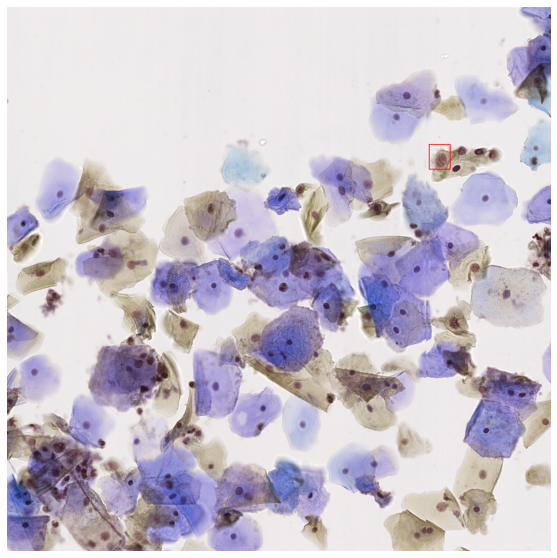

In [82]:
Num = 40
# print(img_dir + df.loc[Num]['path'])
img = cv2.imread(img_dir + df.loc[Num]['path'])
print(img_dir + df.loc[Num]['path'])
print(type(img))
bbox = df.loc[Num]['bbox']

%matplotlib inline
visualize(img, [bbox])
    # bbox = [1603.23, 1558.58, 73.23, 96.86]

In [83]:
df.loc[0]['bbox'][2]

96.86

In [84]:
df.xmin = df.bbox.apply(lambda x : int(x[0]))
df.ymin = df.bbox.apply(lambda x : int(x[1]))
df.w = df.bbox.apply(lambda x : int(x[2]))
df.h = df.bbox.apply(lambda x : int(x[3]))

In [85]:
df.head()

,index,label,bbox,xmin,ymin,w,h,occluded,description,cell_type,iscrowd,path,task
0,0,ASC-US,"[1558.58, 1603.23, 96.86, 73.23]",1558,1603,96,73,False,Atypical squamous cells of undetermined signif...,NaN,0,patch_images/2021.01.08/LBC141-20210105(1)/LBC...,lbc141_lsil
1,1,ASC-US,"[1452.26, 1263.03, 82.69, 94.5]",1452,1263,82,94,False,Atypical squamous cells of undetermined signif...,NaN,0,patch_images/2021.01.08/LBC141-20210105(1)/LBC...,lbc141_lsil
2,2,ASC-US,"[159.33, 1259.04, 178.83, 152.57]",159,1259,178,152,False,Atypical squamous cells of undetermined signif...,NaN,0,patch_images/2021.01.08/LBC141-20210105(1)/LBC...,lbc141_lsil
3,3,ASC-US,"[1522.68, 1224.58, 168.99, 114.85]",1522,1224,168,114,False,Atypical squamous cells of undetermined signif...,NaN,0,patch_images/2021.01.08/LBC141-20210105(1)/LBC...,lbc141_lsil
4,4,ASC-US,"[1514.32, 1057.17, 102.37, 51.19]",1514,1057,102,51,False,Atypical squamous cells of undetermined signif...,NaN,0,patch_images/2021.01.08/LBC141-20210105(1)/LBC...,lbc141_lsil


In [86]:
df.h.describe()

count    1555.000000
mean      160.041158
std        74.733879
min         2.000000
25%       110.000000
50%       146.000000
75%       192.000000
max       632.000000
Name: h, dtype: float64

In [87]:
df.label.unique()

array(['ASC-US', 'LSIL', 'ASC-H', 'Negative', 'HSIL', 'AS', 'LS', 'HS',
       'AH', 'ASC-US with HPV infection', 'LSIL with HPV infection',
       'ASCUS-SIL', 'C'], dtype=object)

In [88]:
df[df['label'] == 'ASC-US'].w.describe()

count    645.000000
mean     158.344186
std       74.477367
min       55.000000
25%      112.000000
50%      142.000000
75%      179.000000
max      646.000000
Name: w, dtype: float64

In [89]:
df[df['label'] == 'LSIL'].w.describe()

count    232.000000
mean     209.620690
std       89.242377
min       12.000000
25%      145.000000
50%      192.000000
75%      261.000000
max      696.000000
Name: w, dtype: float64

<AxesSubplot:>

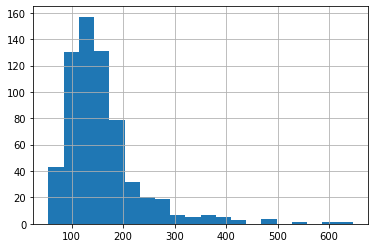

In [90]:
df[df['label'] == 'ASC-US'].w.hist(bins=20)

<AxesSubplot:>

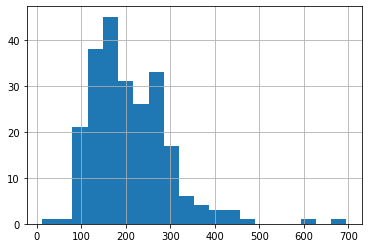

In [91]:
df[df['label'] == 'LSIL'].w.hist(bins=20)

In [92]:
df_data = df.groupby('path')
def get_data(img_id):
    if img_id not in df_data.groups:
        return dict(image_id=img_id, source='', boxes=list())
    
    data  = df_data.get_group(img_id)
#     boxes = data['bbox'].values
    boxes = data[['xmin', 'ymin', 'w', 'h']].values
    return dict(image_id = img_id, boxes = boxes)

image_list = [get_data(img_id) for img_id in df.path.unique()]


[[1262 1234  197  146]
 [1125  193  183  190]]


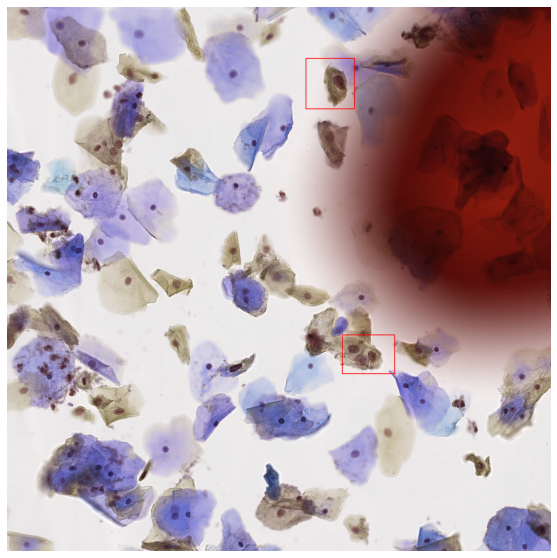

In [93]:
Num = 70
img = cv2.imread('/home/Dataset/scl/' + image_list[Num]['image_id'])
# type(img)
bbox = image_list[Num]['boxes']
print(bbox)
# %matplotlib inline
visualize(img, bbox)

In [94]:
# image_list

In [95]:
df.to_csv('../data/df.csv', index=None)

In [96]:
(df.cell_type).unique()

array([nan, 'Superficial cell'], dtype=object)

In [97]:
df[df['cell_type']=='Superficial cell']

,index,label,bbox,xmin,ymin,w,h,occluded,description,cell_type,iscrowd,path,task
281,281,Negative,"[775.99, 300.94, 100.29, 137.24]",775,300,100,137,False,NaN,Superficial cell,0,patch_images/2021.01.07/LBC84-20210104(1)/LBC8...,lbc84_lsil
288,288,Negative,"[1159.46, 887.63, 110.85, 171.55]",1159,887,110,171,False,NaN,Superficial cell,0,patch_images/2021.01.07/LBC84-20210104(1)/LBC8...,lbc84_lsil
1314,839,Negative,"[657.46, 1360.59, 296.7, 275.0]",657,1360,296,275,False,NaN,Superficial cell,0,patch_images/2021.01.11/LBC200-20210106(1)/LBC...,[lsil] lbc200


In [98]:
df = pd.read_csv('../data/df.csv')
df.shape

(1555, 13)

In [99]:
df.label.value_counts()

ASC-US                       645
AS                           254
LSIL                         232
ASC-US with HPV infection    127
HS                           105
LSIL with HPV infection       81
LS                            41
ASC-H                         24
AH                            21
C                             18
Negative                       3
ASCUS-SIL                      2
HSIL                           2
Name: label, dtype: int64